In [1]:

# ============================================
# 1. Import Libraries
# ============================================
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

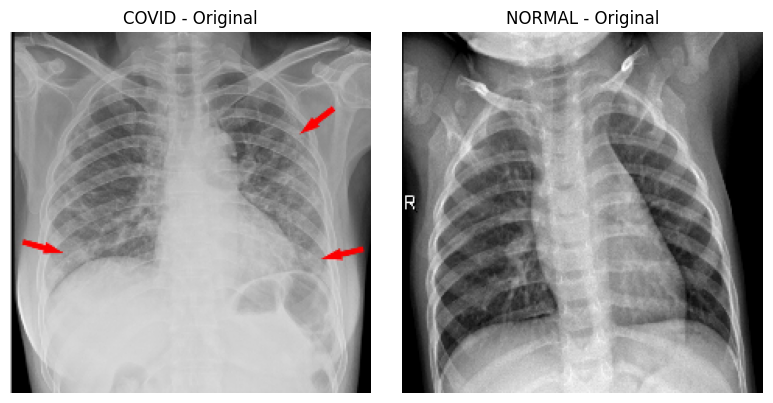

In [2]:
# ============================================
# 2. Menampilkan Gambar sebelum di preprocessing
# ============================================

# Mengambil dataset beserta kelas
base_dir = 'dataset/'  
class_names = ['COVID', 'NORMAL']  
samples = {}

for cls in class_names:
    class_path = os.path.join(base_dir, cls)
    img_list = os.listdir(class_path)
    sample_img = random.choice(img_list)
    samples[cls] = os.path.join(class_path, sample_img)

# Menampilkan sampel gambar dari kedua kelas
plt.figure(figsize=(8, 4))
for i, cls in enumerate(class_names):
    img = mpimg.imread(samples[cls])
    plt.subplot(1, 2, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{cls} - Original")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# ============================================
# 3. Data Preprocessing dan Augmentasi
# ============================================
train_path = 'dataset_test/train'
val_path = 'dataset_test/val'
test_path = 'dataset_test/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(244, 244),
    batch_size=15,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(244, 244),
    batch_size=15,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(244, 244),
    batch_size=15,
    class_mode='binary',
    shuffle=False
)

Found 2400 images belonging to 2 classes.
Found 514 images belonging to 2 classes.
Found 514 images belonging to 2 classes.


In [4]:
# ============================================
# 4. Transfer Learning - MobileNetV2
# ============================================
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(244, 244, 3))
base_model.trainable = False  

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Ditto\AppData\Local\Temp\ipykernel_16084\2425714083.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(244, 244, 3))


c:\Lang\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 82s 490ms/step - accuracy: 0.8341 - loss: 0.3467 - val_accuracy: 0.9708 - val_loss: 0.1012
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 58s 360ms/step - accuracy: 0.9671 - loss: 0.0921 - val_accuracy: 0.9747 - val_loss: 0.0780
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 57s 358ms/step - accuracy: 0.9814 - loss: 0.0590 - val_accuracy: 0.9747 - val_loss: 0.0678
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 57s 354ms/step - accuracy: 0.9797 - loss: 0.0599 - val_accuracy: 0.9728 - val_loss: 0.0631
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 58s 365ms/step - accuracy: 0.9831 - loss: 0.0529 - val_accuracy: 0.9767 - val_loss: 0.0556
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 57s 356ms/step - accuracy: 0.9861 - loss: 0.0409 - val_accuracy: 0.9767 - val_loss: 0.0548
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 58s 361ms/step - accuracy: 0.9856 - loss: 0.0440 - val_accuracy: 0.9786 - val_loss: 0.0487
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 368ms/step - accuracy: 0.9870 -

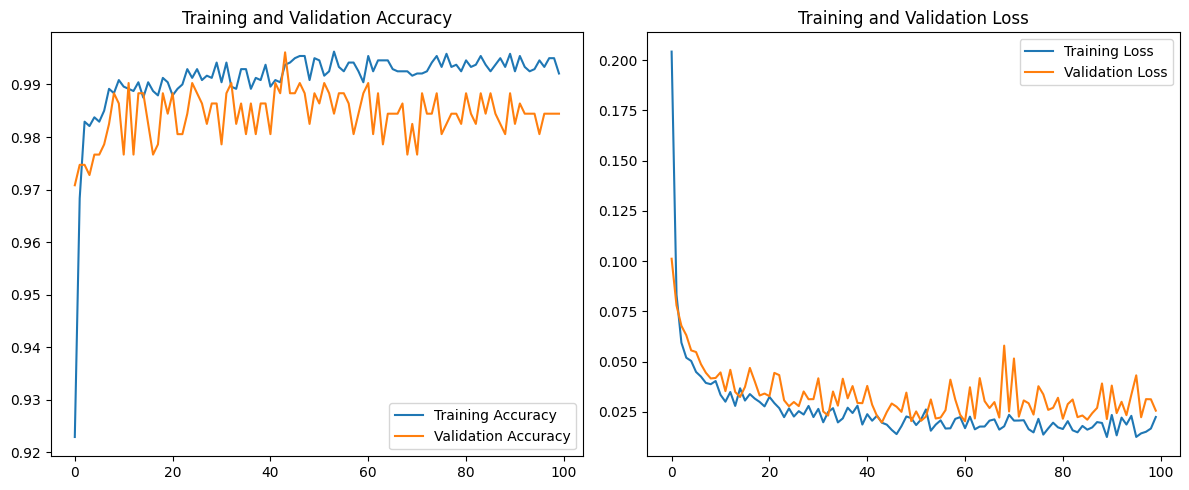

In [5]:
# ============================================
# 5. Training
# ============================================

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
)

# ============================================
# 5.1 Visualisasi Akurasi dan Loss
# ============================================

# Mengambil hasil data sebelumnya
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


[INFO] Gambar COVID: COVID_1560.png
[INFO] Gambar NORMAL: NORMAL_1642.png


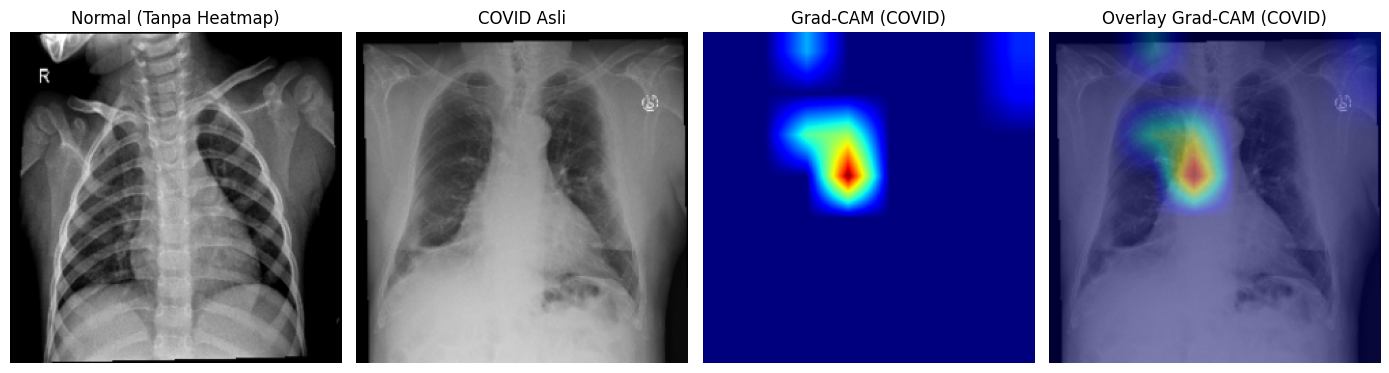

In [58]:
# ========== AMBIL GAMBAR RANDOM COVID DAN NORMAL ==========
covid_test_dir = 'dataset_test/test/covid'
normal_test_dir = 'dataset_test/test/normal'

# Ambil gambar random dari masing-masing kelas
covid_img_path = os.path.join(covid_test_dir, random.choice(os.listdir(covid_test_dir)))
normal_img_path = os.path.join(normal_test_dir, random.choice(os.listdir(normal_test_dir)))

print(f"[INFO] Gambar COVID: {os.path.basename(covid_img_path)}")
print(f"[INFO] Gambar NORMAL: {os.path.basename(normal_img_path)}")

# ========== LOAD & PREPROCESS GAMBAR ==========

def load_preprocess(img_path, size=(244, 244)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0

covid_img_array = load_preprocess(covid_img_path)
normal_img_array = load_preprocess(normal_img_path)

# ========== GRAD-CAM UNTUK GAMBAR COVID SAJA ==========

# Ganti layer kalau perlu (misalnya pakai "block_13_expand" biar heatmap lebih jelas)
grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer("Conv_1").output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(covid_img_array)
    loss = predictions[0]

grads = tape.gradient(loss, conv_outputs)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

conv_outputs = conv_outputs[0]
heatmap = tf.reduce_sum(tf.multiply(conv_outputs, pooled_grads), axis=-1)
heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

# Resize dan overlay ke gambar asli
heatmap_resized = cv2.resize(heatmap.numpy(), (244, 244))
heatmap_colored = np.uint8(255 * heatmap_resized)
heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)

original_covid = cv2.imread(covid_img_path)
original_covid = cv2.resize(original_covid, (244, 244))
overlay_covid = cv2.addWeighted(original_covid, 0.6, heatmap_colored, 0.4, 0)

# Load gambar NORMAL asli (tanpa heatmap)
original_normal = cv2.imread(normal_img_path)
original_normal = cv2.resize(original_normal, (244, 244))

# ========== TAMPILKAN ==========

plt.figure(figsize=(14, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_normal, cv2.COLOR_BGR2RGB))
plt.title("Normal (Tanpa Heatmap)")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(original_covid, cv2.COLOR_BGR2RGB))
plt.title("COVID Asli")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(heatmap_resized, cmap="jet")
plt.title("Grad-CAM (COVID)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(overlay_covid, cv2.COLOR_BGR2RGB))
plt.title("Overlay Grad-CAM (COVID)")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# ============================================
# 7. Tampilkan hasil evaluasi model melalui confusion matriks
# ============================================
Y_pred = model.predict(test_generator)
y_pred = (Y_pred > 0.5).astype(int)

print(classification_report(test_generator.classes, y_pred))
cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()